<a href="https://colab.research.google.com/github/LevWilliams/DigitClassifier/blob/master/DigitIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [2]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#!ls ~/.kaggle
#!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle competitions download -c digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 46.7MB/s]
100% 6.09M/6.09M [00:00<00:00, 38.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 77.8MB/s]
 55% 5.00M/9.16M [00:00<00:00, 49.4MB/s]
100% 9.16M/9.16M [00:00<00:00, 44.8MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import keras

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Load the data
train = pd.read_csv("train.csv.zip")
test = pd.read_csv("test.csv.zip")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

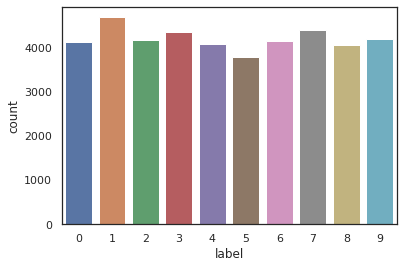

In [6]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [7]:
X_train = X_train / 255.0
test = test / 255.0

Reshaping vects into matricies (images)

In [8]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

May need one-hot-encoding. if necessary, add it here.

In [9]:


# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)



In [10]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

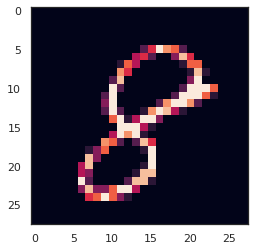

In [11]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [22]:
def create_model():
  model_input = tf.keras.layers.Input(shape = (28,28,1), name = 'img')

  #Tower One
  T1Conv1 = tf.keras.layers.Conv2D(50,kernel_size = (7,7), activation="relu",padding = 'Same')(model_input)
  T1Conv2 = tf.keras.layers.Conv2D(50,kernel_size = (7,7), activation="relu",padding = 'Same')(T1Conv1)
  T1Pool1  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T1Conv2)
  T1Conv3 = tf.keras.layers.Conv2D(50,kernel_size = (3,3), activation="relu",padding = 'Same')(T1Pool1)
  T1Conv4 = tf.keras.layers.Conv2D(50,kernel_size = (3,3), activation="relu",padding = 'Same')(T1Conv3)
  T1Pool2  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T1Conv4)
  T1Pool2 = tf.keras.layers.Dropout(0.5)(T1Pool2) 
  T1 = tf.keras.Model(inputs = model_input,outputs = T1Pool2)

  #Tower Two
  T2Conv1 = tf.keras.layers.Conv2D(50,kernel_size = (5,5), activation="relu",padding = 'Same')(model_input)
  T2Conv2 = tf.keras.layers.Conv2D(50,kernel_size = (5,5), activation="relu",padding = 'Same')(T2Conv1)
  T2Pool1  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T2Conv2)
  T2Conv3 = tf.keras.layers.Conv2D(50,kernel_size = (3,3), activation="relu",padding = 'Same')(T2Pool1)
  T2Conv4 = tf.keras.layers.Conv2D(50,kernel_size = (3,3), activation="relu",padding = 'Same')(T2Conv3)
  T2Pool2  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T2Conv4) 
  T2Pool2 = tf.keras.layers.Dropout(0.5)(T2Pool2) 
  T2 = tf.keras.Model(inputs = model_input,outputs = T2Pool2)

  #Tower Three
  T3Conv1 = tf.keras.layers.Conv2D(50,kernel_size = (3,3), activation="relu",padding = 'Same')(model_input)
  T3Conv2 = tf.keras.layers.Conv2D(50,kernel_size = (3,3), activation="relu",padding = 'Same')(T3Conv1)
  T3Pool1  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T3Conv2)
  T3Conv3 = tf.keras.layers.Conv2D(50,kernel_size = (3,3), activation="relu",padding = 'Same')(T3Pool1)
  T3Conv4 = tf.keras.layers.Conv2D(50,kernel_size = (3,3), activation="relu",padding = 'Same')(T3Conv3)
  T3Pool2  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T3Conv4) 
  T3Pool2 = tf.keras.layers.Dropout(0.5)(T3Pool2) 
  T3 = tf.keras.Model(inputs = model_input,outputs = T3Pool2)

  #Tower Four
  #T4Conv1 = tf.keras.layers.Conv2D(50,kernel_size = (6,6), activation="relu",padding = 'Same')(model_input)
  #T4Conv2 = tf.keras.layers.Conv2D(50,kernel_size = (4,4), activation="relu",padding = 'Same')(T4Conv1)
  #T4Pool1  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T4Conv2)
  #T4Pool2  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T4Pool1) 
  #T4Pool2 = tf.keras.layers.Dropout(0.5)(T4Pool2) 
  #T4 = tf.keras.Model(inputs = model_input,outputs = T4Pool2)

  #Tower Five
  #T5Conv1 = tf.keras.layers.Conv2D(50,kernel_size = (6,6), activation="relu",padding = 'Same')(model_input)
  #T5Conv2 = tf.keras.layers.Conv2D(50,kernel_size = (3,3), activation="relu",padding = 'Same')(T5Conv1)
  #T5Pool1  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T5Conv2)
  #T5Pool2  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(T5Pool1) 
  #T5Pool2 = tf.keras.layers.Dropout(0.5)(T5Pool2) 
  #T5 = tf.keras.Model(inputs = model_input,outputs = T5Pool2)

  #Conv1 = tf.keras.layers.Conv2D(50,kernel_size = (6,6), activation="relu",padding = 'Same')(model_input)
  #Conv2 = tf.keras.layers.Conv2D(50,kernel_size = (5,5), activation="relu",padding = 'Same')(Conv1)
  #Pool1  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(Conv1)
  #Pool1 = tf.keras.layers.Dropout(0.5)(Pool1)
  #Conv3 = tf.keras.layers.Conv2D(50,kernel_size = (4,4),padding = 'Same', activation="relu")(Pool1)
  #Conv4 = tf.keras.layers.Conv2D(50,kernel_size = (3,3),padding = 'Same', activation="relu")(Conv3)
  #Pool2  = tf.keras.layers.MaxPool2D(pool_size=(2,2))(Conv4)
  #Pool2 = tf.keras.layers.Dropout(0.5)(Pool2)

  concatted = tf.keras.layers.concatenate([T1Pool2,T2Pool2,T3Pool2])
  Flat = tf.keras.layers.Flatten()(concatted)
  Dense1 = tf.keras.layers.Dense(units= 250, activation="relu")(Flat)
  Dense1 = tf.keras.layers.Dropout(0.5)(Dense1)
  Dense2 = tf.keras.layers.Dense(units= 175, activation="relu")(Dense1)
  Dense2 = tf.keras.layers.Dropout(0.5)(Dense2)
  Dense3 = tf.keras.layers.Dense(units= 100, activation="relu")(Dense2)
  Dense3 = tf.keras.layers.Dropout(0.5)(Dense3)
  Output = tf.keras.layers.Dense(units= 10, activation="softmax")(Dense3)

  model = tf.keras.Model(inputs = model_input,outputs = Output)
  model.build(input_shape = (28,28,1))

  # Define the optimizer
  optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

  model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

  model.summary()

  return model

In [23]:
model = create_model()

Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 28, 28, 50)   2500        img[0][0]                        
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 28, 28, 50)   1300        img[0][0]                        
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 28, 28, 50)   500         img[0][0]                        
______________________________________________________________________________________

In [24]:


# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



In [25]:


epochs = 10 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86



In [67]:


# Without data augmentation
#history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,validation_data = (X_val, Y_val))



Without data aug the validation accuracy reaches about .985 - .986

In [26]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.12, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [27]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, callbacks=[learning_rate_reduction])

Epoch 1/10
440/440 - 1540s - loss: 0.9125 - accuracy: 0.6943 - val_loss: 0.1280 - val_accuracy: 0.9669
Epoch 2/10
440/440 - 1521s - loss: 0.2408 - accuracy: 0.9398 - val_loss: 0.1470 - val_accuracy: 0.9638
Epoch 3/10
440/440 - 1597s - loss: 0.1774 - accuracy: 0.9580 - val_loss: 0.0581 - val_accuracy: 0.9855
Epoch 4/10
440/440 - 1625s - loss: 0.1577 - accuracy: 0.9621 - val_loss: 0.0638 - val_accuracy: 0.9860
Epoch 5/10
440/440 - 1571s - loss: 0.1545 - accuracy: 0.9666 - val_loss: 0.0512 - val_accuracy: 0.9881
Epoch 6/10
440/440 - 1491s - loss: 0.1628 - accuracy: 0.9664 - val_loss: 0.0757 - val_accuracy: 0.9864
Epoch 7/10
440/440 - 1488s - loss: 0.1595 - accuracy: 0.9672 - val_loss: 0.0647 - val_accuracy: 0.9864
Epoch 8/10
440/440 - 1472s - loss: 0.1513 - accuracy: 0.9679 - val_loss: 0.0764 - val_accuracy: 0.9888
Epoch 9/10
440/440 - 1474s - loss: 0.1636 - accuracy: 0.9671 - val_loss: 0.0862 - val_accuracy: 0.9893
Epoch 10/10
440/440 - 1478s - loss: 0.1538 - accuracy: 0.9681 - val_loss:

In [62]:


# Plot the loss and accuracy curves for training and validation 
#fig, ax = plt.subplots(2,1)
#ax[0].plot(history.history['loss'], color='b', label="Training loss")
#ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
#legend = ax[0].legend(loc='best', shadow=True)

#ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
#ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
#legend = ax[1].legend(loc='best', shadow=True)



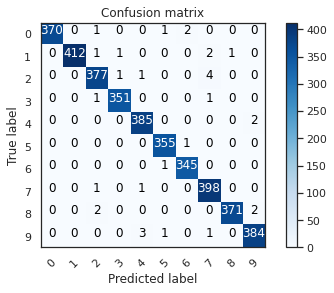

In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

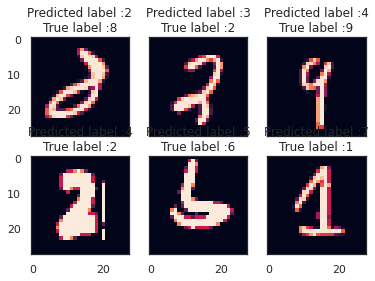

In [72]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [73]:


# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")



In [74]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("LevMNISTSubmission3.csv",index=False)